## IRIS DATASET

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
import pandas as pd

In [3]:
X = pd.DataFrame(data=data.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.Series(data.target,name='Target')

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64>

In [6]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
print(X_train.shape,X_test.shape,sep=" ")
print(y_train.shape,y_test.shape,sep=" ")

(120, 4) (30, 4)
(120,) (30,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier()

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
print("Model score on Test Data : "+str(model.score(X_test,y_test)))

Model score on Test Data : 0.9666666666666667


In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]])

In [20]:
import seaborn as sns

<Axes: >

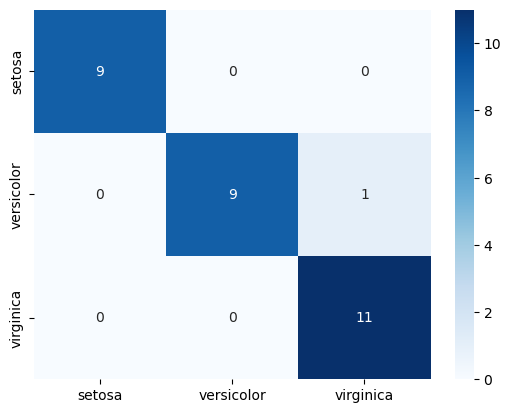

In [21]:
sns.heatmap(matrix,annot=True,fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)

In [22]:
import joblib as jb

In [23]:
jb.dump(model,'iris_model.joblib')

['iris_model.joblib']

In [29]:
X_test[:1]

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3


In [30]:
model.predict(X_test[:1])

array([1])

In [26]:
feature_values = {
                "sepal_length": 6.9,
                "sepal_width": 3.2,
                "petal_length": 5.7,
                "petal_width": 2.3
            }
            
# Make predictions using the model
predicted_class = model.predict([list(feature_values.values())])[0]
predicted_class

/home/krishna-verma/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


2